<a href="https://colab.research.google.com/github/Hchama/Final_Thesis/blob/main/VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch pytorch-cpu torchvision
!pip install fastai --upgrade
import fastai
from fastai.vision.all import *
from fastai.callback.tracker import  EarlyStoppingCallback
from fastai.callback.schedule import lr_find, LRFinder
from PIL import Image

# Increase the maximum limit
Image.MAX_IMAGE_PIXELS = None

  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement pytorch-cpu (from versions: none)
ERROR: No matching distribution found for pytorch-cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s et

In [ ]:
path = '/content/drive/MyDrive/Proj'
data = ImageDataLoaders.from_folder(path, train='train', valid='validation', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75), bs=32)

In [ ]:
import os

# List first 10 files in the training directory
train_files = os.listdir('/content/drive/MyDrive/Proj/train')
print(train_files[:10])

# List first 10 files in the testing directory
test_files = os.listdir('/content/drive/MyDrive/Proj/test')
print(test_files[:10])


['Authentic', 'Artificial']
['a8-ai.jpg', 'a14-ai.jpg', 'a9-ai.jpg', 'a23-ai.jpg', 'a12-ai.jpg', 'a33-ai.jpg', 'a17-ai.jpg', 'a6-ai.png', 'a34-ai.jpg', 'a10-ai.jpg']


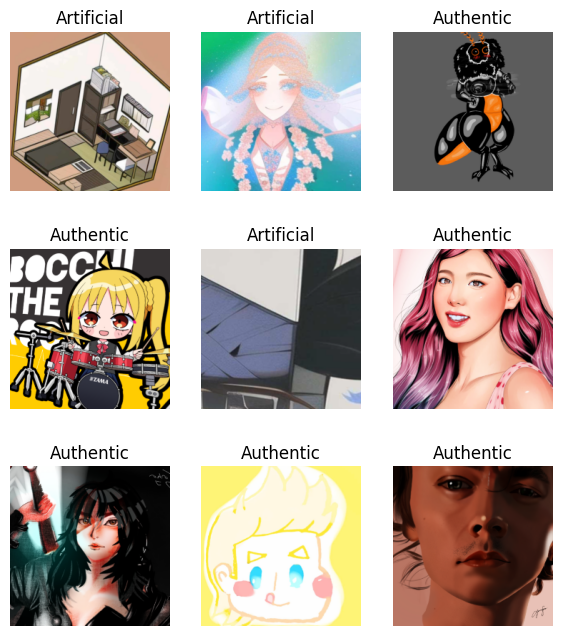

In [ ]:
data.show_batch(nrows=3, figsize=(7,8))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 81.5MB/s]


epoch,train_loss,valid_loss,accuracy,recall_score,precision_score,f1_score,time
0,1.479859,0.852475,0.559524,0.380952,0.592593,0.463768,01:52
1,1.272370,0.796514,0.630952,0.404762,0.739130,0.523077,01:28
2,1.042631,0.890338,0.654762,0.452381,0.760000,0.567164,01:24
3,0.905728,0.807254,0.714286,0.666667,0.736842,0.700000,01:25
4,0.822897,0.798911,0.678571,0.642857,0.692308,0.666667,01:25


No improvement since epoch 1: early stopping


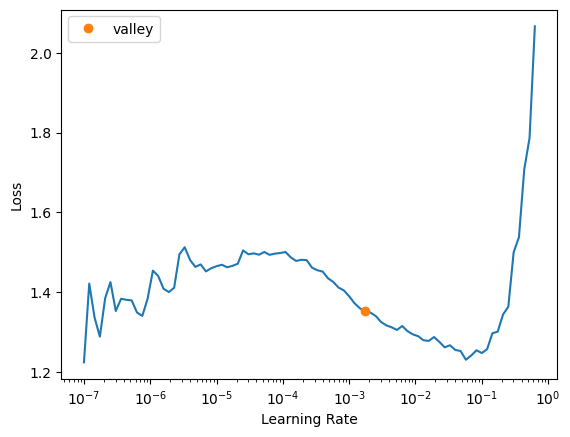

In [ ]:
learn = vision_learner(data, models.vgg19, opt_func=Adam, lr=0.001, metrics=[accuracy, Recall(), Precision(), F1Score()])

early_stopping = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)
learn.add_cb(early_stopping)

learn.lr_find()

learn.fit_one_cycle(20, slice(1e-4, 1e-3))

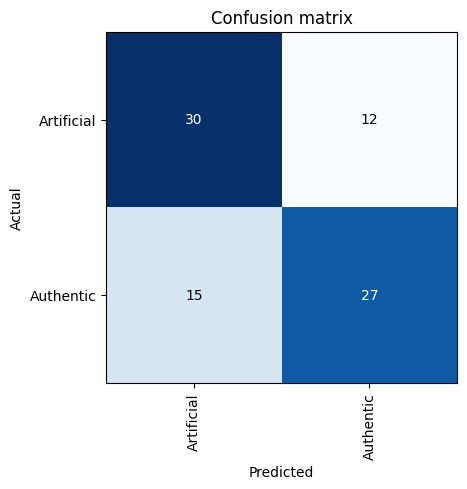

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
folder_path = "/content/drive/MyDrive/Proj/test/"

authentic_count = 0
artificial_count = 0
incorrect_authentic_count = 0
incorrect_artificial_count = 0
correct_count = 0
incorrect_count = 0

# Finds the numnber of correct/incorrect classified images
for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        img = PILImage.create(os.path.join(folder_path, file_name))

        pred_class, _, _ = learn.predict(img)

        print(f"File: {file_name}, Predicted Class: {pred_class}")

        true_class = "Artificial" if file_name.endswith("-ai.jpg") else "Authentic"
        if pred_class == true_class:
            correct_count += 1
            if true_class == "Authentic":
                authentic_count += 1
            else:
                artificial_count += 1
        else:
            incorrect_count += 1
            if true_class == "Authentic":
                incorrect_authentic_count += 1
            else:
                incorrect_artificial_count += 1

print(f"Number of images correctly predicted: {correct_count}")
print(f"Number of images incorrectly predicted: {incorrect_count}")
print(f"Number of authentic images: {authentic_count}")
print(f"Number of artificial images: {artificial_count}")
print(f"Number of incorrectly predicted authentic images: {incorrect_authentic_count}")
print(f"Number of incorrectly predicted artificial images: {incorrect_artificial_count}")


File: a8-ai.jpg, Predicted Class: Artificial


File: a14-ai.jpg, Predicted Class: Authentic


File: a9-ai.jpg, Predicted Class: Artificial


File: a23-ai.jpg, Predicted Class: Artificial


File: a12-ai.jpg, Predicted Class: Artificial


File: a33-ai.jpg, Predicted Class: Artificial


File: a17-ai.jpg, Predicted Class: Artificial


File: a6-ai.png, Predicted Class: Authentic


File: a34-ai.jpg, Predicted Class: Artificial


File: a10-ai.jpg, Predicted Class: Artificial


File: a28-ai.jpg, Predicted Class: Artificial


File: a7-ai.jpg, Predicted Class: Authentic


File: a24-ai.jpg, Predicted Class: Artificial


File: a19-ai.jpg, Predicted Class: Authentic


File: a18-ai.jpg, Predicted Class: Artificial


File: a1-ai.png, Predicted Class: Authentic


File: a26-ai.jpg, Predicted Class: Artificial


File: a4-ai.png, Predicted Class: Authentic


File: a37-ai.jpg, Predicted Class: Artificial


File: a40-ai.jpg, Predicted Class: Artificial


File: a16-ai.jpg, Predicted Class: Artificial


File: a30-ai.jpg, Predicted Class: Artificial


File: a31-ai.jpg, Predicted Class: Authentic


File: a22-ai.jpg, Predicted Class: Artificial


File: a39-ai.jpg, Predicted Class: Artificial


File: a11-ai.jpg, Predicted Class: Artificial


File: a3-ai.png, Predicted Class: Artificial


File: a20-ai.jpg, Predicted Class: Artificial


File: a41-ai.jpg, Predicted Class: Artificial


File: a35-ai.jpg, Predicted Class: Artificial


File: a2-ai.jpg, Predicted Class: Artificial


File: a21-ai.jpg, Predicted Class: Artificial


File: a25-ai.jpg, Predicted Class: Artificial


File: a15-ai.jpg, Predicted Class: Artificial


File: a36-ai.jpg, Predicted Class: Artificial


File: a6.jpg, Predicted Class: Authentic


File: a13.jpg, Predicted Class: Authentic


File: a29-ai.jpg, Predicted Class: Artificial


File: a13-ai.jpg, Predicted Class: Artificial


File: a4.jpg, Predicted Class: Authentic


File: a10.jpg, Predicted Class: Authentic


File: a9.jpg, Predicted Class: Authentic


File: a2.jpg, Predicted Class: Authentic


File: a27-ai.jpg, Predicted Class: Artificial


File: a42-ai.jpg, Predicted Class: Artificial


File: a17.jpg, Predicted Class: Artificial


File: a32-ai.jpg, Predicted Class: Artificial


File: a5-ai.jpg, Predicted Class: Artificial


File: a11.jpg, Predicted Class: Authentic


File: a38-ai.jpg, Predicted Class: Artificial


File: a16.jpg, Predicted Class: Authentic


File: a12.jpg, Predicted Class: Authentic


File: a14.jpg, Predicted Class: Authentic


File: a40.jpg, Predicted Class: Authentic


File: a7.jpg, Predicted Class: Authentic


File: a34.jpg, Predicted Class: Authentic


File: a39.jpg, Predicted Class: Authentic


File: a35.jpg, Predicted Class: Artificial


File: a36.jpg, Predicted Class: Authentic


File: a26.jpg, Predicted Class: Artificial


File: a29.jpg, Predicted Class: Artificial


File: a5.jpg, Predicted Class: Authentic


File: a18.jpg, Predicted Class: Authentic


File: a1.jpg, Predicted Class: Authentic


File: a38.jpg, Predicted Class: Artificial


File: a15.jpg, Predicted Class: Authentic


File: a21.jpg, Predicted Class: Authentic


File: a28.jpg, Predicted Class: Artificial


File: a30.jpg, Predicted Class: Artificial


File: a22.jpg, Predicted Class: Artificial


File: a24.jpg, Predicted Class: Artificial


File: a8.jpg, Predicted Class: Artificial


File: a20.jpg, Predicted Class: Artificial


File: a23.jpg, Predicted Class: Artificial


File: a19.jpg, Predicted Class: Authentic


File: a31.jpg, Predicted Class: Authentic


File: a32.jpg, Predicted Class: Artificial


File: a3.jpg, Predicted Class: Authentic


File: a25.jpg, Predicted Class: Artificial


File: a33.jpg, Predicted Class: Artificial


File: a37.jpg, Predicted Class: Authentic


File: a42.jpg, Predicted Class: Authentic


File: a41.jpg, Predicted Class: Authentic


File: a27.jpg, Predicted Class: Artificial
Number of images correctly predicted: 63
Number of images incorrectly predicted: 21
Number of authentic images: 29
Number of artificial images: 34
Number of incorrectly predicted authentic images: 17
Number of incorrectly predicted artificial images: 4


In [ ]:
#Testing results
TP = authentic_count
TN = artificial_count
FP = incorrect_authentic_count
FN = incorrect_artificial_count

Total = TP + TN + FP + FN

accuracy = (TP + TN) / Total

precision = TP / (TP + FP)

recall = TP / (TP + FN)

f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

Accuracy: 0.75
precision: 0.6304347826086957
recall: 0.8787878787878788
f1_score: 0.7341772151898734
